<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/MainQuest/MainQuest03_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_AIFFEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [2]:
# import
from PIL import Image
import glob
import os

 - ref : https://wikidocs.net/83


In [3]:
# image resize
def resize_images(img_path):
  images = glob.glob(img_path +"/*.jpg")

  print(len(images),"Image to be resizes")
  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
  target_size = (150,150)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size , Image.ANTIALIAS)
    new_img.save(img,'JPEG')

  print(len(images) , "images resized.")

In [4]:
folders = ['scissor' ,'rock','paper']

for folder in folders:
  img_path = '/content/drive/MyDrive/Colab Notebooks/aiffel/rock_scissor_paper/'+folder
  resize_images(img_path)
  print(f'{folder} 이미지 resize 완료')


714 Image to be resizes
714 images resized.
scissor 이미지 resize 완료
773 Image to be resizes
773 images resized.
rock 이미지 resize 완료
730 Image to be resizes
730 images resized.
paper 이미지 resize 완료


In [5]:
714+773+730

2217

In [6]:
import numpy as np

def load_data(img_path , number_of_data=2217):
  # 가위 : 0 , 바위: 1 , 보: 2
  img_size = 150
  color = 3
  # 이미지 데이터와 라벨 (가위:0 , 바위:1 , 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성 합니다.
  imgs = np.zeros(number_of_data*img_size*img_size*color , dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels = np.zeros(number_of_data , dtype = np.int32)

  idx = 0
  for file in glob.iglob(img_path + '/scissor/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
    labels[idx] = 0
    idx = idx+1

  for file in glob.iglob(img_path+'/rock/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=1   # 바위 : 1
      idx=idx+1

  for file in glob.iglob(img_path+'/paper/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=2   # 보 : 2
      idx=idx+1

  print('학습데이터(x_train)의 이미지 개수는',idx , '입니다')
  return imgs , labels




In [7]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/aiffel/rock_scissor_paper"
(x_train , y_train) = load_data(image_dir_path)

학습데이터(x_train)의 이미지 개수는 2217 입니다


In [8]:
x_train_norm = x_train/255.0 # 정규화

In [9]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')

x_train shape : (2217, 150, 150, 3)
y_train shape : (2217,)


라벨 0


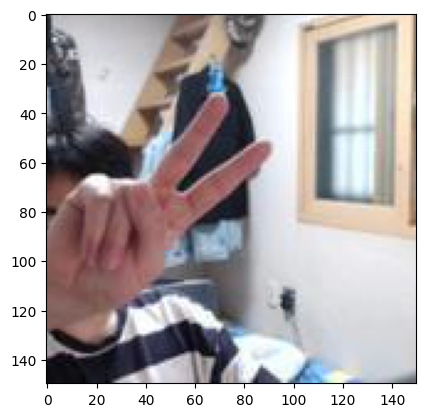

In [10]:
import matplotlib.pyplot as plt

i = np.random.randint(2000)
plt.imshow(x_train[i])
print('라벨',y_train[i])

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) # 복잡한 문제 일수록 이 수를 늘려 보자.
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  14
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 72, 72, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (

In [12]:
# compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# 모델 훈련
model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
70/70 [==============================] - 16s 33ms/step - loss: 2.3070 - accuracy: 0.7799
Epoch 2/20
70/70 [==============================] - 2s 30ms/step - loss: 0.1778 - accuracy: 0.9283
Epoch 3/20
70/70 [==============================] - 2s 31ms/step - loss: 0.0877 - accuracy: 0.9590
Epoch 4/20
70/70 [==============================] - 2s 32ms/step - loss: 0.0648 - accuracy: 0.9747
Epoch 5/20
70/70 [==============================] - 2s 30ms/step - loss: 0.0420 - accuracy: 0.9820
Epoch 6/20
70/70 [==============================] - 2s 30ms/step - loss: 0.0591 - accuracy: 0.9761
Epoch 7/20
70/70 [==============================] - 2s 30ms/step - loss: 0.0686 - accuracy: 0.9711
Epoch 8/20
70/70 [==============================] - 2s 30ms/step - loss: 0.1522 - accuracy: 0.9621
Epoch 9/20
70/70 [==============================] - 2s 29ms/step - loss: 0.1577 - accuracy: 0.9662
Epoch 10/20
70/70 [==============================] - 2s 32ms/step - loss: 0.0519 - accuracy: 0.9779
Epoch 11

# test 파일

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
가위 이미지 resize 완료!


In [15]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
보 이미지 resize 완료!


In [16]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
바위 이미지 resize 완료!


In [17]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test"
(x_test , y_test) = load_data(image_dir_path,number_of_data=300)

학습데이터(x_train)의 이미지 개수는 300 입니다


In [18]:
x_test_norm = x_test/255.0 # 정규화

In [19]:
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_test shape : (300, 150, 150, 3)
y_test shape : (300,)


In [20]:
# testset 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 26.9278 - accuracy: 0.3300 - 593ms/epoch - 59ms/step
test_loss: 26.927831649780273
test_accuracy: 0.33000001311302185


 - test dataset 검증에서 accuracy 0.31 로 매우 낮게 나와서 , 데이터  augmentation 방법을 활용해 보았다. 학습 이미지의 배경도 각기 다르고 , 제대로 feature 추출이 안되는 느낌이 많이 들어서 시도해 보았다.

 - 학습데이터 수집에 한계가 명확한 것 같다.

In [21]:
# # With data augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train_norm)

데이터 증강(Data Augmentation)을 위해 다음과 같은 변형을 선택했습니다:

- 일부 훈련 이미지를 무작위로 10도 회전시킵니다.
- 일부 훈련 이미지를 무작위로 10% 확대/축소합니다.
- 이미지를 가로로 10%만큼 무작위로 이동시킵니다.
- 이미지를 세로로 10%만큼 무작위로 이동시킵니다.
- 수직 뒤집기나 수평 뒤집기는 오분류를 유발할 수 있으므로 적용하지 않았습니다.


In [22]:
history = model.fit(datagen.flow(x_train_norm,y_train, batch_size = 20) ,epochs = 20 )

Epoch 1/20
111/111 [==============================] - 17s 135ms/step - loss: 2.3127 - accuracy: 0.3775
Epoch 2/20
111/111 [==============================] - 14s 130ms/step - loss: 1.0885 - accuracy: 0.3500
Epoch 3/20
111/111 [==============================] - 15s 131ms/step - loss: 1.0429 - accuracy: 0.4051
Epoch 4/20
111/111 [==============================] - 15s 134ms/step - loss: 1.0415 - accuracy: 0.4041
Epoch 5/20
111/111 [==============================] - 15s 131ms/step - loss: 1.0237 - accuracy: 0.3987
Epoch 6/20
111/111 [==============================] - 15s 132ms/step - loss: 1.0017 - accuracy: 0.4222
Epoch 7/20
111/111 [==============================] - 15s 132ms/step - loss: 0.9824 - accuracy: 0.4429
Epoch 8/20
111/111 [==============================] - 15s 131ms/step - loss: 0.9672 - accuracy: 0.4465
Epoch 9/20
111/111 [==============================] - 15s 131ms/step - loss: 0.9632 - accuracy: 0.4632
Epoch 10/20
111/111 [==============================] - 15s 131ms/step - l

In [23]:
# testset 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.4811 - accuracy: 0.3167 - 111ms/epoch - 11ms/step
test_loss: 1.4811056852340698
test_accuracy: 0.3166666626930237


In [24]:
predicted_result = model.predict(x_test_norm) # model 이 추론한 확률값
predicted_labels = np.argmax(predicted_result , axis =1)

idx = np.random.randint(300)
print('model.predict 결과 : ' , predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ' , predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 10ms/step
model.predict 결과 :  [0.169969   0.79259807 0.03743298]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  2


예측 확률 분포 : [0.1691239 0.7771977 0.0536784]
라벨2 , 예측결과 : 1


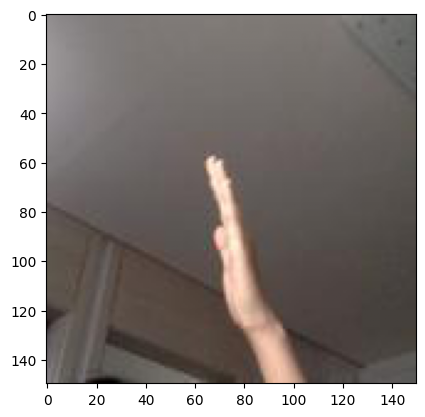

예측 확률 분포 : [0.17248355 0.78912693 0.03838957]
라벨0 , 예측결과 : 1


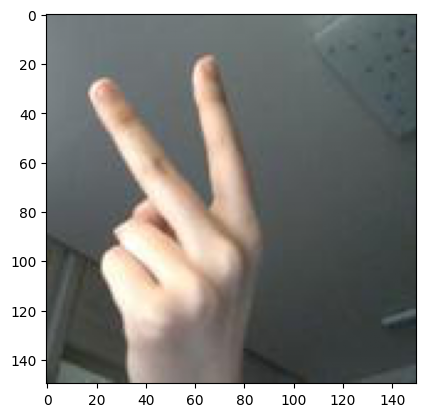

예측 확률 분포 : [0.2109077  0.74639165 0.04270062]
라벨2 , 예측결과 : 1


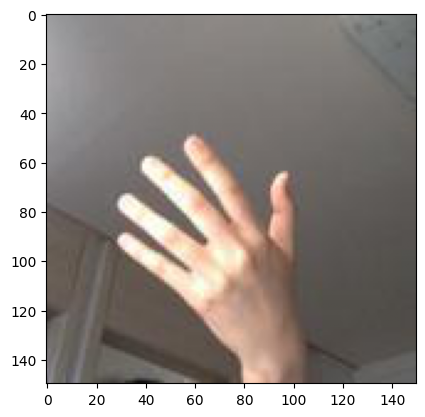

예측 확률 분포 : [0.20109062 0.7487536  0.05015582]
라벨2 , 예측결과 : 1


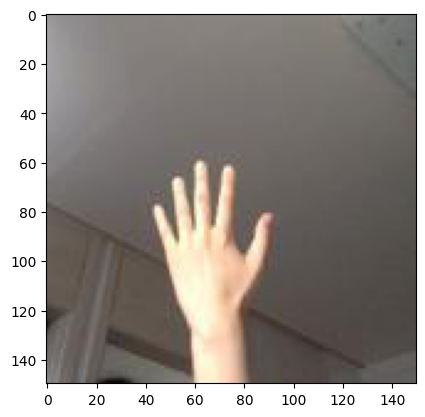

예측 확률 분포 : [0.18265787 0.7749564  0.04238568]
라벨0 , 예측결과 : 1


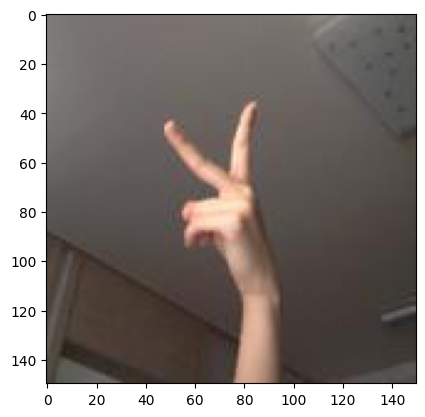

In [25]:
import random
wrong_predict_list = []

for i , _ in enumerate(predicted_labels):
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덥하게 5개만 뽑아 봅시다.

samples = random.choices(population = wrong_predict_list , k = 5)

for n in samples:
  print("예측 확률 분포 : " + str(predicted_result[n]))
  print("라벨" + str(y_test[n]) + " , 예측결과 : " + str(predicted_labels[n]))
  plt.imshow(x_test_norm[n] , cmap = plt.cm.binary)
  plt.show()